# Reddit User Graph

Generate graph of user posts, where the nodes are individual subreddits and the edges indicate that a user has posted in both subreddits.

In [1]:
% matplotlib inline

import pandas as pd
import networkx as nx
import itertools
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 40, 40
# plt.rcParams['figure.dpi'] = 120

In [2]:
chunks = pd.read_csv('../cleaned_data/processed_data.csv', chunksize=10000)  # import data in chunks
df = pd.concat(chunks, ignore_index=True)
df = df.drop_duplicates(['author', 'title'], keep='last')                    # keep only the most recent duplicate
df = df[['author', 'subreddit']]
df = df[df['author'] != 'AutoModerator']                                     # remove posts from the moderator bot
df = df.dropna()

In [3]:
df.shape

(2189135, 2)

In [4]:
df = df.sample(frac=.2)  # use a sample of the data

In [5]:
df.shape

(437827, 2)

## Build dictionary of user posts

In [6]:
user_posts = {}

for i, row in df.iterrows():        
    user = row['author']
    subreddit = row['subreddit']
    
    if user not in user_posts.keys():
        user_posts[user] = []
    
    if subreddit not in user_posts[user]:
        user_posts[user].append(subreddit)
        

## Setting up `NetworkX` graph

### Extract nodes and edges

In [7]:
nodes = []
edges = []



for user in user_posts.keys():
    if len(user_posts[user]) > 1:
        
        subreddits = sorted(user_posts[user])
        
        for subreddit in subreddits:
            if subreddit not in nodes:
                nodes.append(subreddit)
                
        _edges = [edge for edge in itertools.combinations(subreddits, 2)]
        for edge in _edges:
            if edge not in edges:
                edges.append(edge)

print('Nodes: {}, Edges: {}'.format(len(nodes), len(edges)))    

Nodes: 2566, Edges: 63915


### Building the graph

In [8]:
reddit_graph = nx.Graph()

In [9]:
reddit_graph.add_nodes_from(nodes)
reddit_graph.add_edges_from(edges)

In [10]:
print("Reddit Graph - Nodes: {}, Edges: {}".format(reddit_graph.number_of_nodes(), reddit_graph.number_of_edges()))

Reddit Graph - Nodes: 2566, Edges: 63915


In [11]:
# nx.draw(reddit_graph, with_labels=True)

This isn't exactly interpretable, so let's adjust the plotting of the graph.

CPU times: user 56.5 s, sys: 38.7 ms, total: 56.5 s
Wall time: 56.5 s


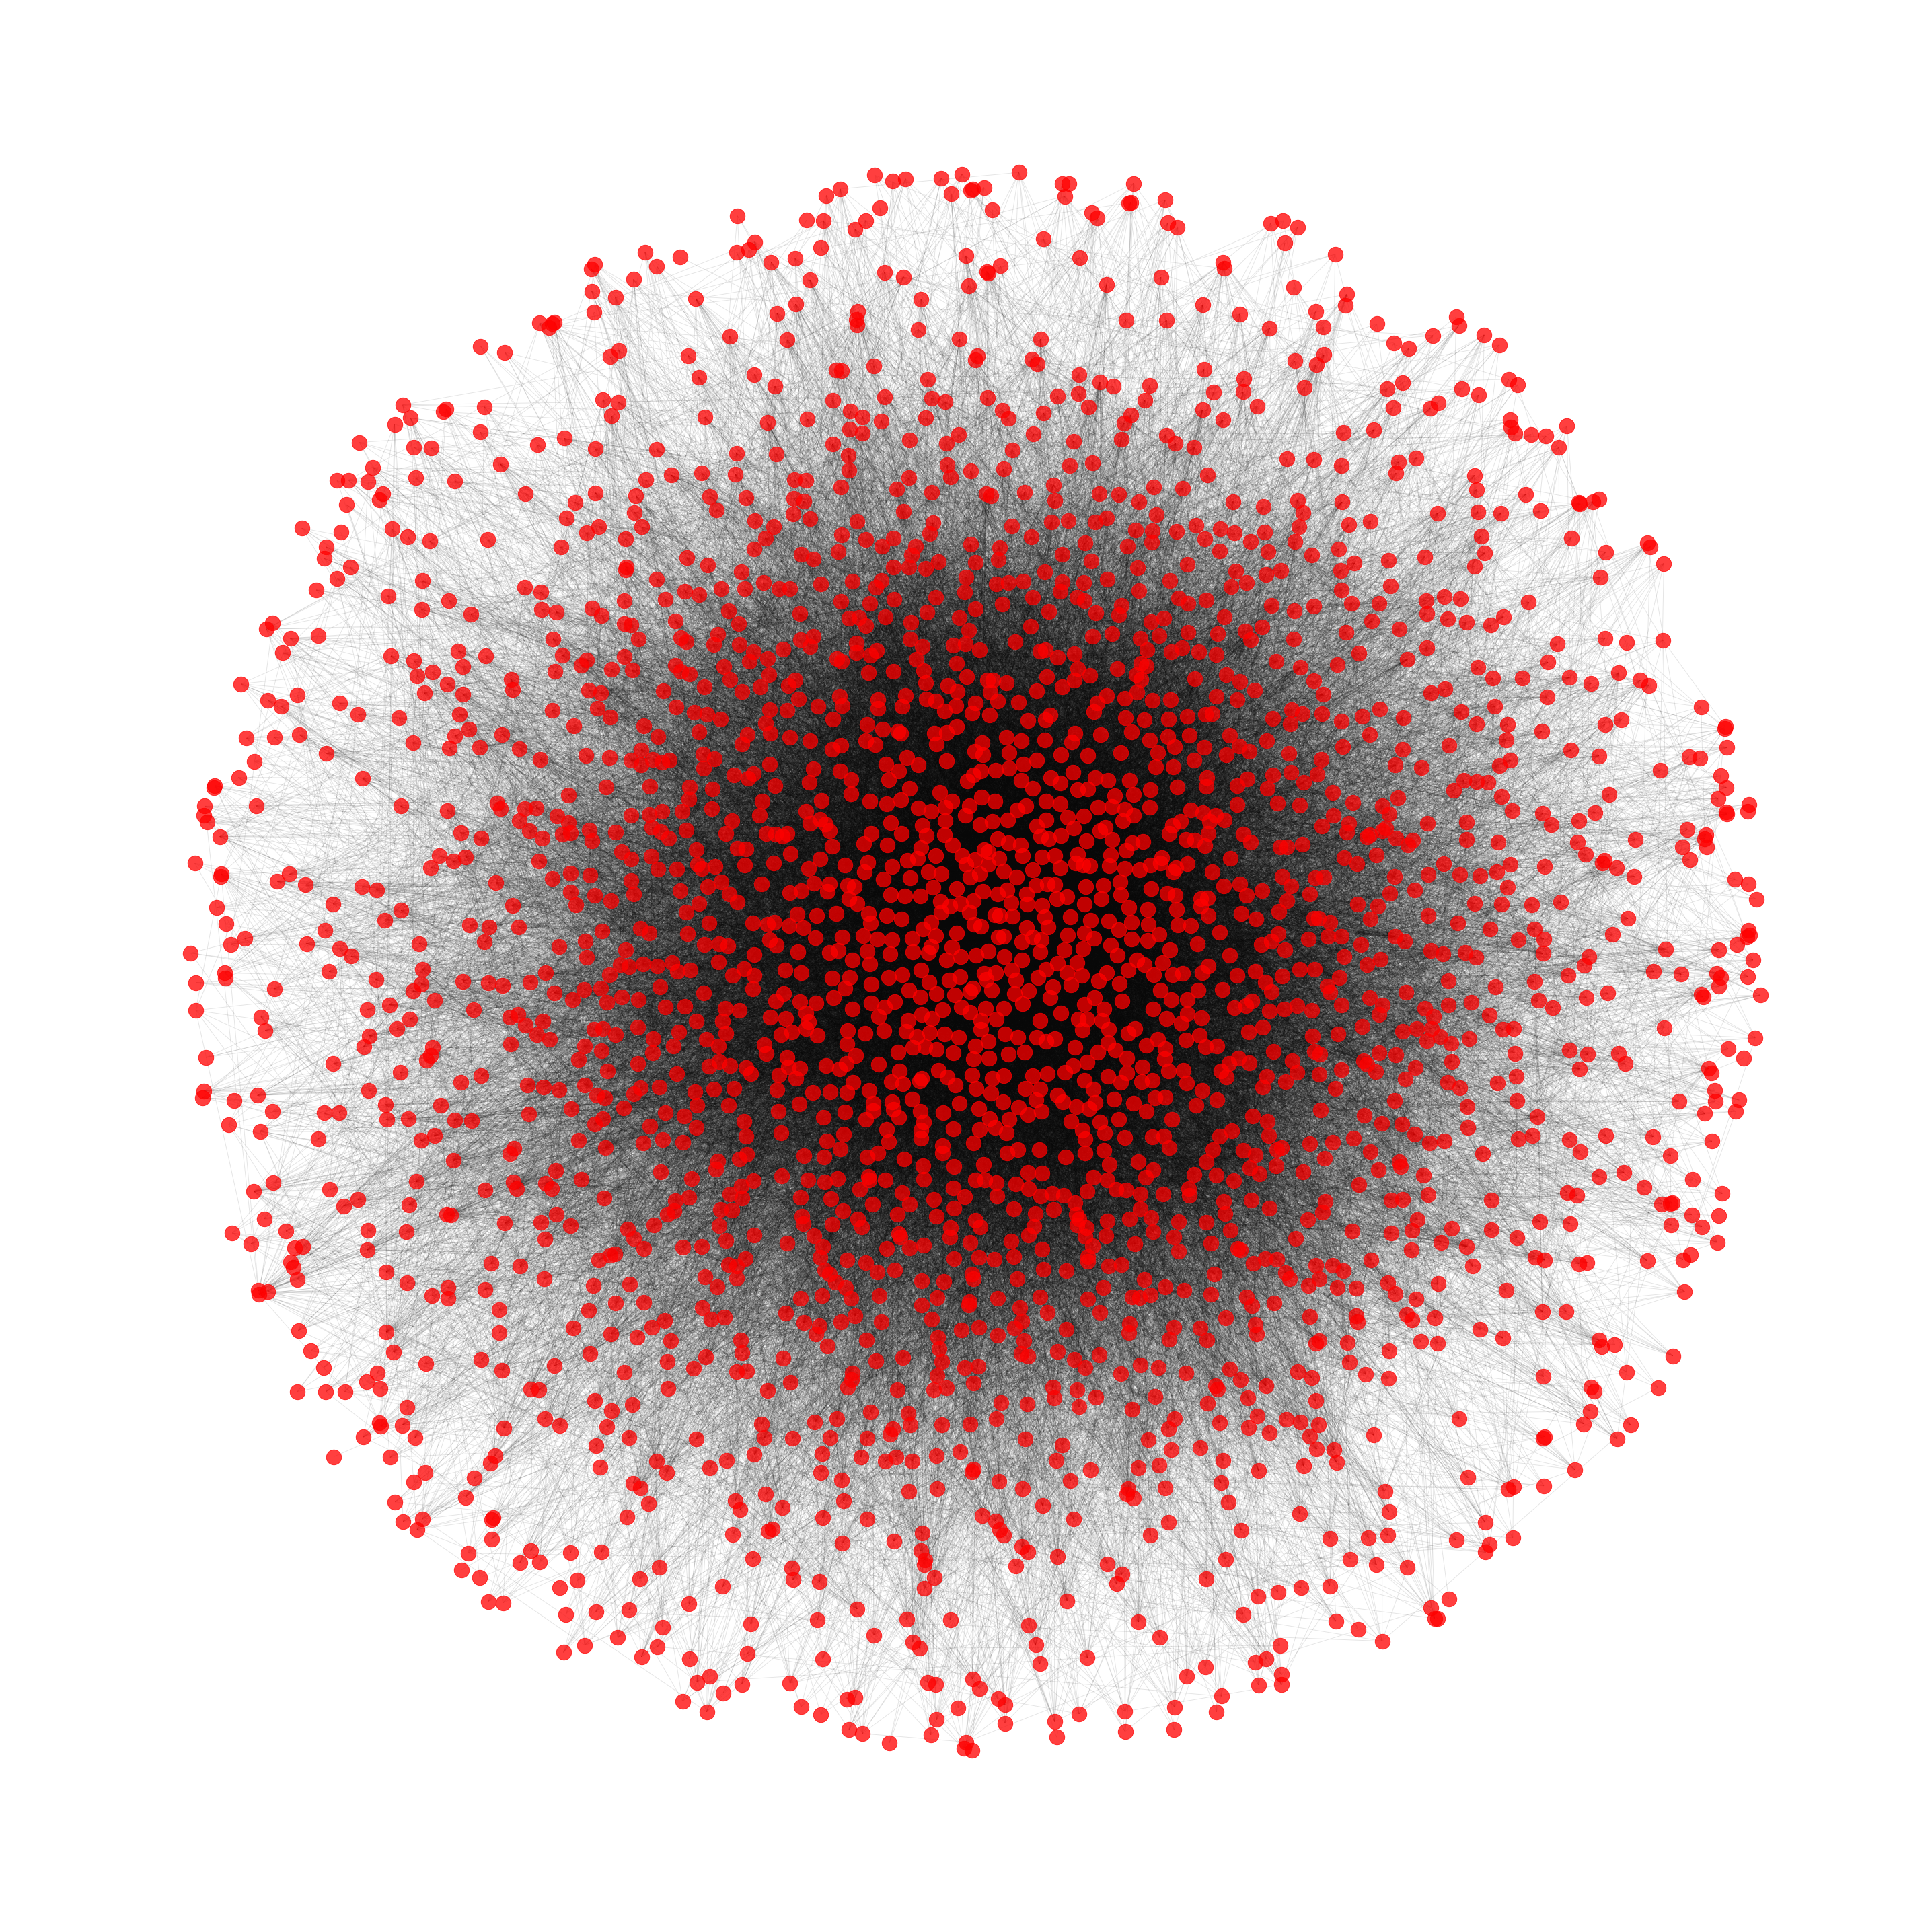

In [12]:
%%time

position = nx.spring_layout(reddit_graph, k=1, iterations=100)   
# position = nx.random_layout(reddit_graph)   

nx.draw_networkx_nodes(reddit_graph, position, node_color='r', node_size=500, alpha=0.75)
nx.draw_networkx_edges(reddit_graph, position, width=1.0, alpha=0.3)
# nx.draw_networkx_labels(reddit_graph, position, font_size=20, font_weight='bold')


plt.axis('off')
plt.tight_layout()

plt.savefig('../presentation/subreddit_graph.png')